In [1]:
import io
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import pandas as pd
import numpy as np
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image

In [2]:
# Code to read file from directory (google colab)
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [3]:
#Authenticate and create the pyDrive client
# This only needs to be done once per notebook
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [10]:
id = '1_v83YoKA5kAX8ir5IUfHsS8V4NNHEasS' #your dataset ID here
downloaded = drive.CreateFile({'id':id}) #drive from pyDrive
downloaded.GetContentFile('wasteDataset_new.zip') #datasetFilename.zip

In [11]:
import zipfile
zip_file = 'wasteDataset_new.zip' #datasetFilename.zip
zip_ref = zipfile.ZipFile(zip_file, 'r')
zip_ref.extractall()
zip_ref.close()

In [12]:
# Define our directories
base_dir = 'wasteDataset_new' #datasetFilename

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

In [13]:
# Define the directory for wasteDataset (train)
train_surgical_mask_dir = os.path.join(train_dir, 'surgical_mask')
train_medications_dir = os.path.join(train_dir, 'medications')
train_spray_cans_dir = os.path.join(train_dir, 'spray_cans')
train_metal_container_dir = os.path.join(train_dir, 'metal_container')
train_cans_dir = os.path.join(train_dir, 'cans')
train_plastic_bag_dir = os.path.join(train_dir, 'plastic_bag')
train_plastic_bottle_dir = os.path.join(train_dir, 'plastic_bottle')
train_plastic_cup_dir = os.path.join(train_dir, 'plastic_cup')
train_glass_dir = os.path.join(train_dir, 'glass')
train_cardboard_dir = os.path.join(train_dir, 'cardboard')
train_tetra_pak_dir = os.path.join(train_dir, 'tetra_pak')
train_paper_dir = os.path.join(train_dir, 'paper')
train_paper_cup_dir = os.path.join(train_dir, 'paper_cup')
train_newspaper_dir = os.path.join(train_dir, 'newspaper')

In [14]:
#Define the directory for wasteDataset (test)
test_surgical_mask_dir = os.path.join(test_dir, 'surgical_mask')
test_medications_dir = os.path.join(test_dir, 'medications')
test_spray_cans_dir = os.path.join(test_dir, 'spray_cans')
test_metal_container_dir = os.path.join(test_dir, 'metal_container')
test_cans_dir = os.path.join(test_dir, 'cans')
test_plastic_bag_dir = os.path.join(test_dir, 'plastic_bag')
test_plastic_bottle_dir = os.path.join(test_dir, 'plastic_bottle')
test_plastic_cup_dir = os.path.join(test_dir, 'plastic_cup')
test_glass_dir = os.path.join(test_dir, 'glass')
test_cardboard_dir = os.path.join(test_dir, 'cardboard')
test_tetra_pak_dir = os.path.join(test_dir, 'tetra_pak')
test_paper_dir = os.path.join(test_dir, 'paper')
test_paper_cup_dir = os.path.join(test_dir, 'paper_cup')
test_newspaper_dir = os.path.join(test_dir, 'newspaper')

In [15]:
#wasteDataset filenames (train)
train_surgical_mask_filenames = os.listdir(train_surgical_mask_dir)
train_medications_filenames = os.listdir(train_medications_dir)
train_spray_cans_filenames = os.listdir(train_spray_cans_dir)
train_metal_container_filenames = os.listdir(train_metal_container_dir)
train_cans_filenames = os.listdir(train_cans_dir)
train_plastic_bag_filenames = os.listdir(train_plastic_bag_dir)
train_plastic_bottle_filenames = os.listdir(train_plastic_bottle_dir)
train_plastic_cup_filenames = os.listdir(train_plastic_cup_dir)
train_glass_filenames = os.listdir(train_glass_dir)
train_cardboard_filenames = os.listdir(train_cardboard_dir)
train_tetra_pak_filenames = os.listdir(train_tetra_pak_dir)
train_paper_filenames = os.listdir(train_paper_dir)
train_paper_cup_filenames = os.listdir(train_paper_cup_dir)
train_newspaper_filenames = os.listdir(train_newspaper_dir)

In [16]:
#wasteDataset filenames (test)
test_surgical_mask_filenames = os.listdir(test_surgical_mask_dir)
test_medications_filenames = os.listdir(test_medications_dir)
test_spray_cans_filenames = os.listdir(test_spray_cans_dir)
test_metal_container_filenames = os.listdir(test_metal_container_dir)
test_cans_filenames = os.listdir(test_cans_dir)
test_plastic_bag_filenames = os.listdir(test_plastic_bag_dir)
test_plastic_bottle_filenames = os.listdir(test_plastic_bottle_dir)
test_plastic_cup_filenames = os.listdir(test_plastic_cup_dir)
test_glass_filenames = os.listdir(test_glass_dir)
test_cardboard_filenames = os.listdir(test_cardboard_dir)
test_tetra_pak_filenames = os.listdir(test_tetra_pak_dir)
test_paper_filenames = os.listdir(test_paper_dir)
test_paper_cup_filenames = os.listdir(test_paper_cup_dir)
test_newspaper_filenames = os.listdir(test_newspaper_dir)

In [ ]:
import os

# Function to print the file structure of a directory
def print_directory_structure(directory):
    for dirpath, dirnames, filenames in os.walk(directory):
        level = dirpath.replace(directory, '').count(os.sep)
        indent = ' ' * 4 * level
        print(f"{indent}{os.path.basename(dirpath)}/")
        sub_indent = ' ' * 4 * (level + 1)
        for fname in filenames:
            print(f"{sub_indent}{fname}")

# Print the file structure of the train directory
print("Train Dataset File Structure:")
print_directory_structure(os.path.join(base_dir, 'train'))

# Print the file structure of the test directory
print("Test Dataset File Structure:")
print_directory_structure(os.path.join(base_dir, 'test'))

In [41]:
#Check the content of dataset
base_dir = 'wasteDataset_new'
print('Contents of base directory:')
print(os.listdir(base_dir))

print('\nContents of train directory:')
print(os.listdir(f'{base_dir}/train'))

print('\nContents of test directory:')
print(os.listdir(f'{base_dir}/test'))

Contents of base directory:
['test', 'train']

Contents of train directory:
['medications', 'glass', 'metal_container', 'cardboard', 'spray_cans', 'paper_cup', 'surgical_mask', 'plastic_cup', 'plastic_bottle', 'tetra_pak', 'cans', 'plastic_bag', 'newspaper', 'paper']

Contents of test directory:
['medications', 'glass', 'metal_container', 'cardboard', 'spray_cans', 'paper_cup', 'surgical_mask', 'plastic_cup', 'plastic_bottle', 'tetra_pak', 'cans', 'plastic_bag', 'newspaper', 'paper']


In [44]:
from PIL import Image
import os

# Set the valid image extensions
valid_extensions = ['.jpg', '.jpeg', '.png']

# Set the train and test directories
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

# Define the classes in your dataset
class_names = ['surgical_mask', 'paper', 'medications',
               'newspaper', 'plastic_cup', 'spray_cans',
               'cardboard', 'tetra_pak', 'plastic_bottle',
               'cans', 'metal_container', 'glass', 'plastic_bag']

# Counters for valid and invalid images
train_valid_count = 0
train_invalid_count = 0
test_valid_count = 0
test_invalid_count = 0

# Iterate over the train directory
for class_name in class_names:
    class_train_dir = os.path.join(train_dir, class_name)
    for file_name in os.listdir(class_train_dir):
        file_path = os.path.join(class_train_dir, file_name)
        file_extension = os.path.splitext(file_path)[1].lower()
        if file_extension in valid_extensions:
            try:
                # Open the image file
                with Image.open(file_path) as img:
                    # Check if the image can be loaded without errors
                    img.verify()
                    train_valid_count += 1
            except (IOError, OSError):
                print('Invalid image: ', file_path)
                train_invalid_count += 1
                # Delete the invalid image
                os.remove(file_path)

# Iterate over the test directory
for class_name in class_names:
    class_test_dir = os.path.join(test_dir, class_name)
    for file_name in os.listdir(class_test_dir):
        file_path = os.path.join(class_test_dir, file_name)
        file_extension = os.path.splitext(file_path)[1].lower()
        if file_extension in valid_extensions:
            try:
                # Open the image file
                with Image.open(file_path) as img:
                    # Check if the image can be loaded without errors
                    img.verify()
                    test_valid_count += 1
            except (IOError, OSError):
                print('Invalid image: ', file_path)
                test_invalid_count += 1
                # Delete the invalid image
                os.remove(file_path)

# Print completion message
print('Invalid images deleted from the train dataset')

Invalid image:  wasteDataset_new/train/cardboard/cardboard (403).jpg
Invalid images deleted from the train dataset


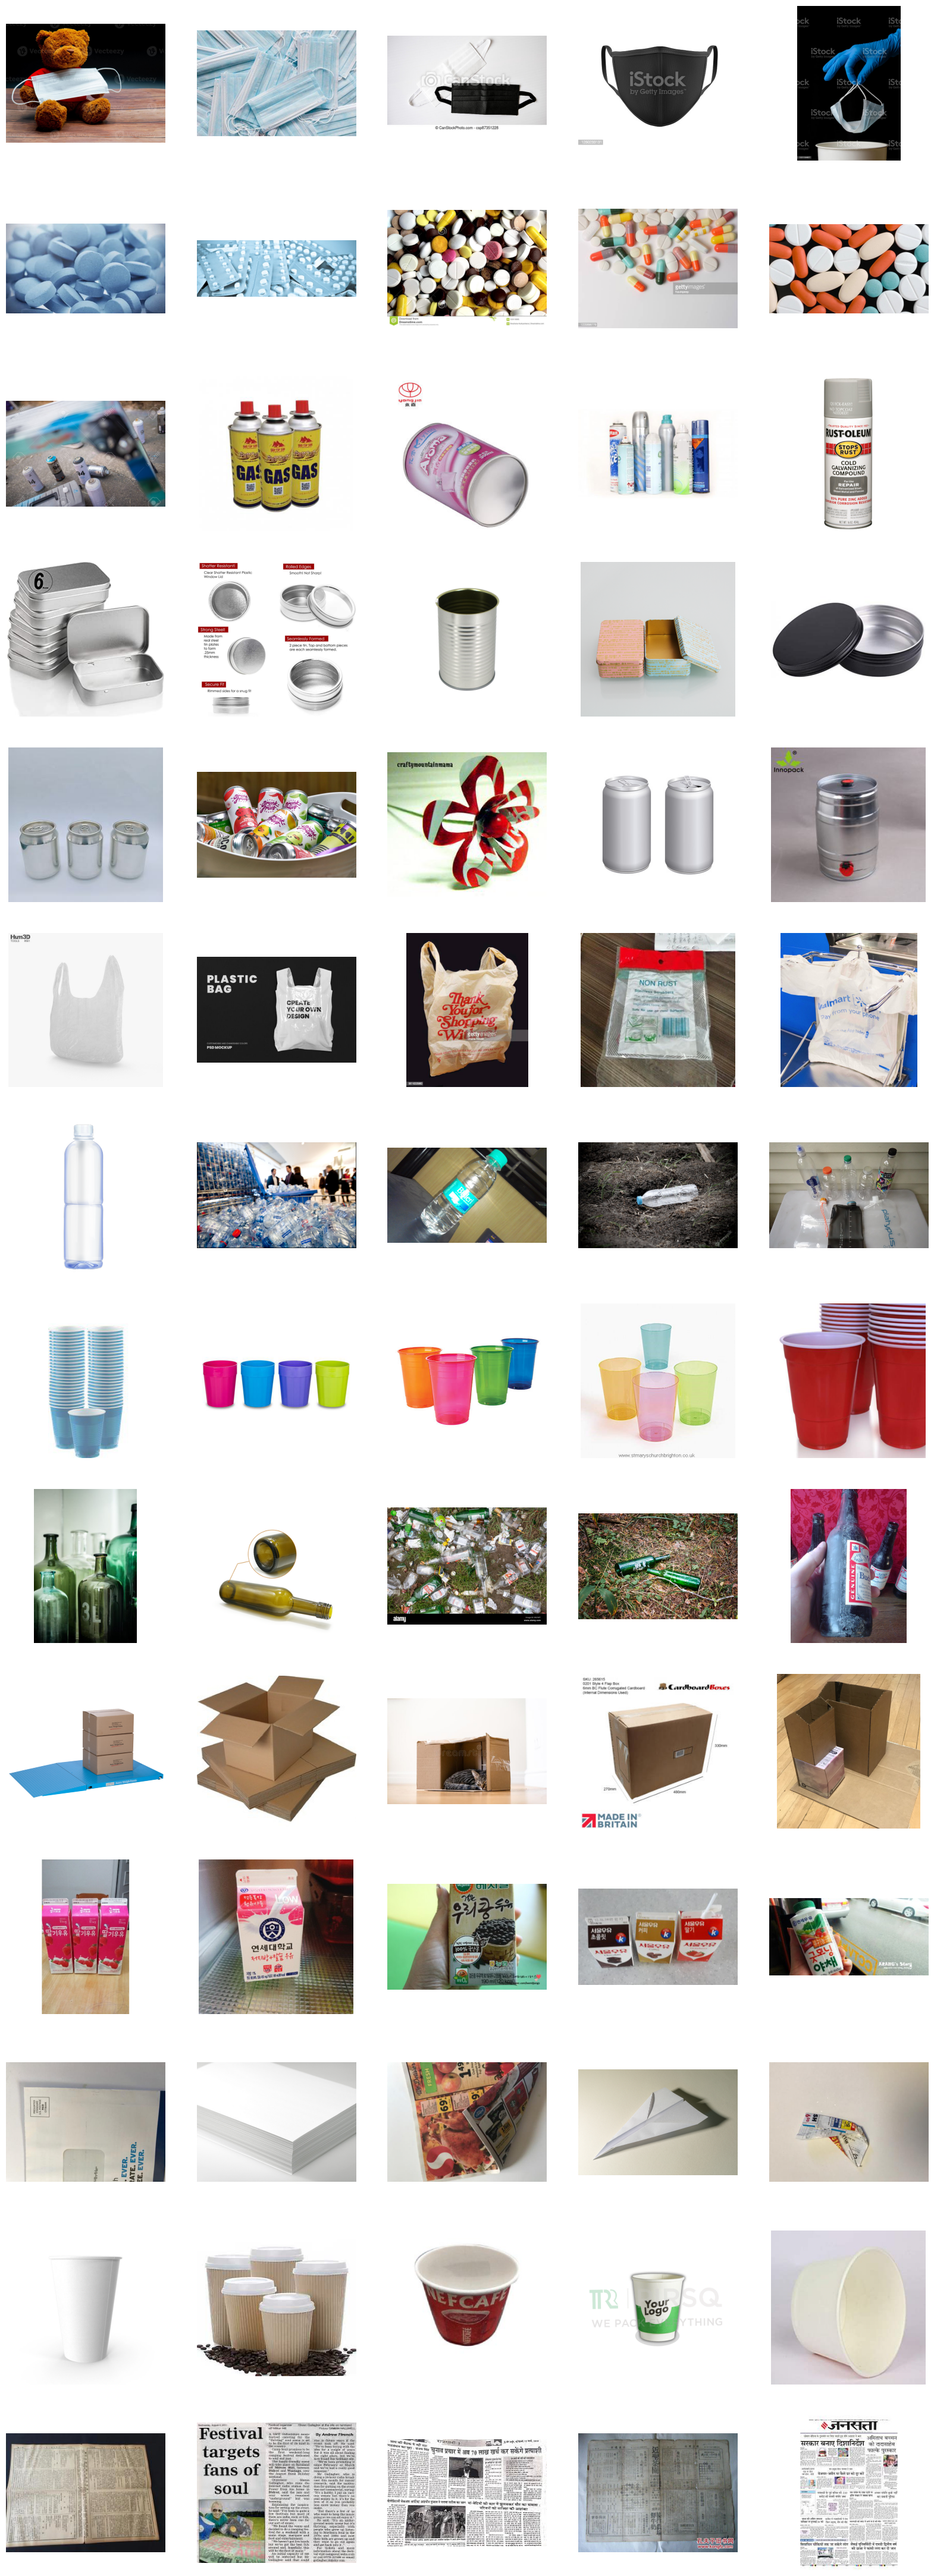

In [47]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Define the number of rows and columns in the grid
nrows = 14
ncols = 5

# Set the starting index for displaying images
pic_index = 5

# Create a figure with the specified size
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

# Lists of image paths for each class
check_surgical_mask = [os.path.join(train_surgical_mask_dir, filename)
                       for filename in train_surgical_mask_filenames[pic_index - 5:pic_index]]

check_medications = [os.path.join(train_medications_dir, filename)
                     for filename in train_medications_filenames[pic_index - 5:pic_index]]

check_spray_cans = [os.path.join(train_spray_cans_dir, filename)
                    for filename in train_spray_cans_filenames[pic_index - 5:pic_index]]

check_metal_container = [os.path.join(train_metal_container_dir, filename)
                         for filename in train_metal_container_filenames[pic_index - 5:pic_index]]

check_cans = [os.path.join(train_cans_dir, filename)
              for filename in train_cans_filenames[pic_index - 5:pic_index]]

check_plastic_bag = [os.path.join(train_plastic_bag_dir, filename)
                     for filename in train_plastic_bag_filenames[pic_index - 5:pic_index]]

check_plastic_bottle = [os.path.join(train_plastic_bottle_dir, filename)
                        for filename in train_plastic_bottle_filenames[pic_index - 5:pic_index]]

check_plastic_cup = [os.path.join(train_plastic_cup_dir, filename)
                     for filename in train_plastic_cup_filenames[pic_index - 5:pic_index]]

check_glass = [os.path.join(train_glass_dir, filename)
               for filename in train_glass_filenames[pic_index - 5:pic_index]]

check_cardboard = [os.path.join(train_cardboard_dir, filename)
                   for filename in train_cardboard_filenames[pic_index - 5:pic_index]]

check_tetra_pak = [os.path.join(train_tetra_pak_dir, filename)
                   for filename in train_tetra_pak_filenames[pic_index - 5:pic_index]]

check_paper = [os.path.join(train_paper_dir, filename)
               for filename in train_paper_filenames[pic_index - 5:pic_index]]

check_paper_cup = [os.path.join(train_paper_cup_dir, filename)
                   for filename in train_paper_cup_filenames[pic_index - 5:pic_index]]

check_newspaper = [os.path.join(train_newspaper_dir, filename)
                   for filename in train_newspaper_filenames[pic_index - 5:pic_index]]

# Iterate over each image path and display it in the subplot
for i, img_path in enumerate(check_surgical_mask + check_medications + check_spray_cans +
                             check_metal_container + check_cans + check_plastic_bag +
                             check_plastic_bottle + check_plastic_cup + check_glass +
                             check_cardboard + check_tetra_pak + check_paper +
                             check_paper_cup + check_newspaper):
    # Set up subplot; subplot index starts at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('off')  # Don't show axes/gridlines

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [48]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   vertical_flip = True,
                                   fill_mode = 'nearest')

# Test dataset should not be augmented!
test_datagen = ImageDataGenerator(rescale = 1.0/255.)

# Flow train images in the batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'categorical',
                                                    target_size = (200, 200))

# Flow test images in batches of 20 using test_datagen generator
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size = 20,
                                                  class_mode = 'categorical',
                                                  target_size= (200, 200))

Found 5600 images belonging to 14 classes.
Found 615 images belonging to 14 classes.


In [49]:
# Function to retrieve unique class labels in a directory
dataset_dir = train_dir
def get_class_labels(directory):
    class_labels = []
    for sub_dir in os.listdir(directory):
        if os.path.isdir(os.path.join(directory, sub_dir)):
            class_labels.append(sub_dir)
    return class_labels

# Get class labels in the dataset
class_labels = get_class_labels(dataset_dir)

# Sort the class labels in ascending order
class_labels.sort()

# Print the class labels with their corresponding indices
for index, class_label in enumerate(class_labels):
    print(f"Class {index}: {class_label}")

Class 0: cans
Class 1: cardboard
Class 2: glass
Class 3: medications
Class 4: metal_container
Class 5: newspaper
Class 6: paper
Class 7: paper_cup
Class 8: plastic_bag
Class 9: plastic_bottle
Class 10: plastic_cup
Class 11: spray_cans
Class 12: surgical_mask
Class 13: tetra_pak


In [50]:
# Install the required libraries
!pip install -U -q gdown tensorflow

# Import necessary modules
import gdown
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Define the file ID and download the weights file from Google Drive
file_id = '1Pc38dQctV0-7JzI0OKcLHWAQyJS3I8NM'
url = f'https://drive.google.com/uc?id={file_id}'
weights_path = '1Pc38dQctV0-7JzI0OKcLHWAQyJS3I8NM'

gdown.download(url, weights_path, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1Pc38dQctV0-7JzI0OKcLHWAQyJS3I8NM
To: /content/1Pc38dQctV0-7JzI0OKcLHWAQyJS3I8NM
100%|██████████| 87.9M/87.9M [00:00<00:00, 128MB/s]


'1Pc38dQctV0-7JzI0OKcLHWAQyJS3I8NM'

In [51]:
# Set the input shape and remove the dense layers
from tensorflow.keras import layers
image_size = (200,200)
pre_trained_model = InceptionV3(input_shape = (image_size[0], image_size[1], 3),
                                include_top = False,
                                weights = None)

# Load the pre-trained weights you downloaded
pre_trained_model.load_weights(weights_path)

# Freeze the weights of the layers
for layer in pre_trained_model.layers:
  layer.trainable = False

In [52]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 99, 99, 32)   864         ['input_2[0][0]']                
                                                                                                  
 batch_normalization_94 (BatchN  (None, 99, 99, 32)  96          ['conv2d_94[0][0]']              
 ormalization)                                                                                    
                                                                                       

In [53]:
# Choose `mixed_7` as the last layer of your base model
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 10, 10, 768)


In [54]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import Model, layers

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)

# Add a fully connected layer with 1024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)

# Add a dropout layer with a dropout rate of 0.2
x = layers.Dropout(0.2)(x)

# Add another fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add another dropout layer with a dropout rate of 0.2
x = layers.Dropout(0.2)(x)

# Add another fully connected layer with 256 hidden units and ReLU activation
x = layers.Dense(256, activation='relu')(x)

# Add another dropout layer with a dropout rate of 0.2
x = layers.Dropout(0.2)(x)

# Add a final softmax layer for classification
x = layers.Dense(14, activation='softmax')(x)

# Append the dense network to the base model
model = Model(pre_trained_model.input, x)

# Print the model summary
model.summary()


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 99, 99, 32)   864         ['input_2[0][0]']                
                                                                                                  
 batch_normalization_94 (BatchN  (None, 99, 99, 32)  96          ['conv2d_94[0][0]']              
 ormalization)                                                                                    
                                                                                            

In [55]:
batch_size = 20
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer = RMSprop(learning_rate = 0.0001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [56]:
# Specify the desired number of training steps
desired_train_steps = 250

# Calculate the batch size based on the desired number of training steps
batch_size = len(train_generator) // desired_train_steps

# Recalculate the actual number of training steps using the updated batch size
train_steps = len(train_generator) // batch_size

# Calculate the number of validation steps based on the updated batch size
valid_steps = len(test_generator) // batch_size

# Adjust the number of validation steps to match the number of training steps
if valid_steps > train_steps:
    valid_steps = train_steps

# Print the values
print("Number of training steps:", train_steps)
print("Number of validation steps:", valid_steps)

Number of training steps: 280
Number of validation steps: 31


In [57]:
# Define Callbacks
class myCallback(tf.keras.callbacks.Callback):
  # Define the correct function signature for on_epoc_end
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy') != 0.8 and logs.get('accuracy') > 0.99:
      print('\nReached 99% accuracy so cancelling training!')

      # Stop training once the above condition is met
      self.model.stop_training = True

In [61]:
# Train the model
callback = myCallback()

history = model.fit(
    train_generator,
    steps_per_epoch=train_steps,
    epochs=50,
    validation_data=test_generator,
    validation_steps=valid_steps,
    callbacks=[callback]
)

Epoch 1/50
280/280 [==============================] - 136s 481ms/step - loss: 0.6692 - accuracy: 0.7811 - val_loss: 0.4979 - val_accuracy: 0.8374
Epoch 2/50
280/280 [==============================] - 131s 470ms/step - loss: 0.6571 - accuracy: 0.7841 - val_loss: 0.5361 - val_accuracy: 0.8439
Epoch 3/50
280/280 [==============================] - 134s 478ms/step - loss: 0.6424 - accuracy: 0.7932 - val_loss: 0.5102 - val_accuracy: 0.8455
Epoch 4/50
280/280 [==============================] - 133s 475ms/step - loss: 0.6236 - accuracy: 0.7941 - val_loss: 0.4857 - val_accuracy: 0.8602
Epoch 5/50
280/280 [==============================] - 134s 479ms/step - loss: 0.5898 - accuracy: 0.8041 - val_loss: 0.5100 - val_accuracy: 0.8472
Epoch 6/50
280/280 [==============================] - 133s 472ms/step - loss: 0.5981 - accuracy: 0.8050 - val_loss: 0.5249 - val_accuracy: 0.8520
Epoch 7/50
280/280 [==============================] - 134s 479ms/step - loss: 0.5804 - accuracy: 0.8136 - val_loss: 0.5093 -

In [62]:
# Evaluate the model
loss, accuracy = model.evaluate(test_generator, steps=valid_steps)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

31/31 [==============================] - 13s 414ms/step - loss: 0.5621 - accuracy: 0.8715
Test loss: 0.5621
Test accuracy: 0.8715


In [64]:
model.save('model.h5')

In [79]:
from google.colab import files
files.download("model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

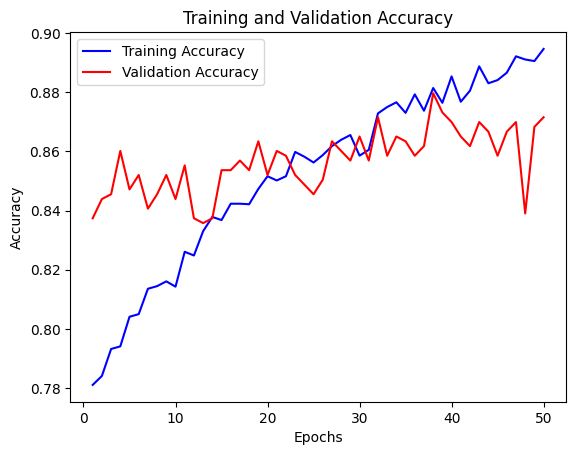

In [65]:
# Get the training and validation accuracy from the history object
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Get the number of epochs
epochs = range(1, len(training_accuracy) + 1)

# Plot the training accuracy
plt.plot(epochs, training_accuracy, 'b', label='Training Accuracy')

# Plot the validation accuracy (if available)
if 'val_accuracy' in history.history:
    plt.plot(epochs, validation_accuracy, 'r', label='Validation Accuracy')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [77]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
    # Predicting images
    path = fn
    img = image.load_img(path, target_size=(200, 200))

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])

    classes = model.predict(images, batch_size=20)
    predicted_class_index = np.argmax(classes[0])
    predicted_class_name = class_names[predicted_class_index]
    prediction_probability = classes[0][predicted_class_index]

    print("File:", fn)
    print("Predicted class:", predicted_class_name)
    print("Probability:", prediction_probability)

Saving medications (295).jpg to medications (295).jpg
1/1 [==============================] - 0s 26ms/step
File: medications (295).jpg
Predicted class: newspaper
Probability: 1.0
